# Exploratory Data Analysis
* 탐색적 데이터 분석 : 수치 요약, 시각화 등을 이용해 데이터를 다각도로 탐색하고 변수 간 잠재적 관계를 찾아내는 과정.

사용 데이터 : Pima diabetes (출처 : [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database))

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 살펴보기
- `shape` : 데이터 형태(row, col 개수)
- `info()` : 컬럼명, Non-null 데이터 수, 데이터 타입
- `isnull()` : 결측치 확인
- `describe()` : 기초통계량, include 옵션으로 object형만 / 수치형만 따로 볼 수 있음.

In [2]:
# 데이터 로드
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()  # 변수별 결측치 개수 확인

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# df.describe(include="object")  # object 자료형만 확인
# df.describe(include="number")  # 수치형 데이터만 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Pregnancies : 평균 3명의 아이, 평균이 중앙값보다 높음 -> max 값이 크기 때문이라 추측 가능
- Glucose : 1사분위 값이 99인데 min이 0 -> 결측치가 아닐지 의심해 볼 수 있음
- BloodPressure, SkinThickness, BMI : min=0 -> 0일 수 없으므로 결측치라고 추측 가능

In [7]:
# 학습에 사용할 변수 리스트 생성
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화
- 실제 데이터 셋에 결측치는 없지만, 0으로 저장된 값 중 결측치로 예측되는 정보들이 있다.
- 해당 데이터를 결측치로 변환, 시각화 해보기

In [8]:
# 변수들 중 Pregnancies(임신 횟수)를 제외하고는 결측치일 것이라 예측.
# 해당 컬럼들의 0값을 결측치로 변환.

cols = feature_columns[1:]  # Pregnancies 제외한 변수 목록
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

- Insulin 변수의 결측치가 많음을 확인할 수 있음.
- 지난 주 DTC 모델에서 Insulin의 변수 중요도가 높지 않았는데, 결측치가 많았기 때문이 아닐까라고 추측할 수 있다.

In [9]:
# 결측치의 비율 확인
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

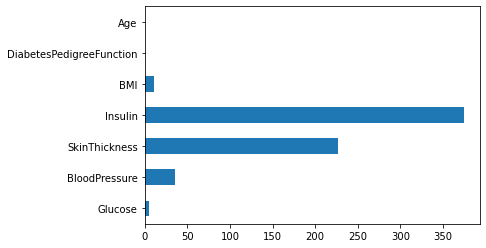

In [10]:
# 결측치 개수 시각화: 가로막대그래프

df_null.sum().plot.barh()

<AxesSubplot:>

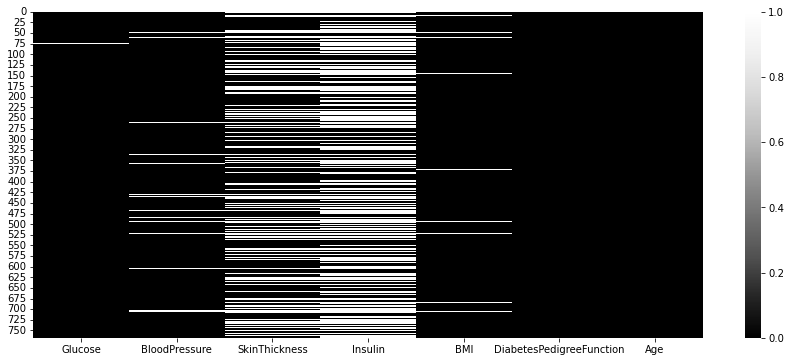

In [11]:
# 결측치 시각화: heatmap

plt.figure(figsize=(15, 6))

# sns.heatmap(df_null)  # 컬러로 시각화
# sns.heatmap(df_null, cmap="Greys")  # 결측치가 검정색
sns.heatmap(df_null, cmap="Greys_r")  # 결측치가 흰색

- True = 1 = 흰색
- False = 0 = 검정색

## Outcome
정답값(=target, label)인 Outcome에 대한 EDA

In [12]:
# 개수
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# 비율
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

- 발병하지 않는(=0) 케이스가 훨씬 많다.

#### Pregnancies와 Outcome의 비율 확인
임신횟수에 따른 당뇨병 발병률 비율 확인

In [14]:
# groupby를 통해 그룹화, mean값과 count값을 확인

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()  # 여러 연산값을 볼 때 agg 사용
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

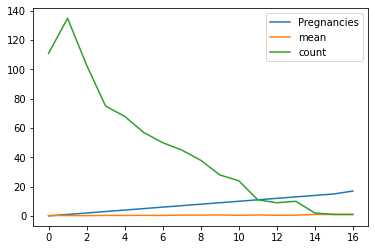

In [15]:
df_po.plot()

<AxesSubplot:>

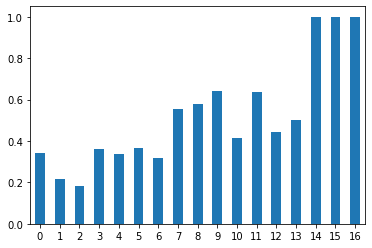

In [16]:
# 평균값에 대해서만 막대 그래프 출력
df_po["mean"].plot.bar(rot=0)  # rot=0 : 글자 방향 정방향으로 설정

## 다양한 plot
- countplot
- barplot
- boxplot
- violinplot
- swarmplot
- distplot

In [35]:
# 경고 메세지 무시 코드
# 그래프를 그리면서 경고 메세지가 나오는 경우가 있어 추가

import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action="default")  # 기본

### countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

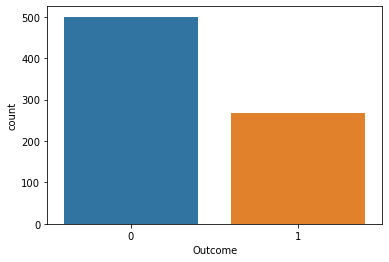

In [17]:
sns.countplot(data=df, x="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

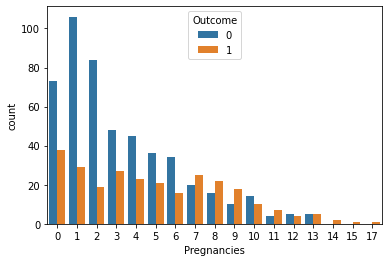

In [18]:
# 임신횟수에 따른 당뇨병 발병 빈도수

sns.countplot(data=df, x="Pregnancies", hue="Outcome")  # hue : 선택한 속성값에 따라 색상을 다르게 표현

- DecisionTree 알고리즘의 경우 조건이 많으면(=수치형 데이터의 범위가 넓으면), 케이스가 적을 때(이 경우 14~17 범위) 오버피팅이 발생할 수 있다. → 범주화 해서 해결할 수 있음!
- 연속된 수치 데이터를 범주화 해서 표현하기도 함 → 원핫 인코딩

In [19]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수 생성

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

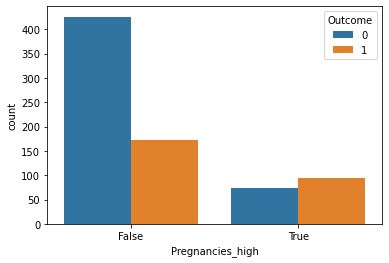

In [20]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

- 임신횟수가 많으면 발병률이 높다.

### barplot
* 기본 설정 : y축에는 평균을 추정해서 그림.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

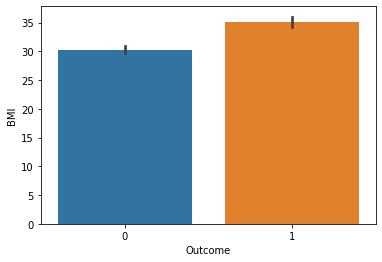

In [21]:
# 당뇨병 발병에 따른 BMI 비교

sns.barplot(data=df, x="Outcome", y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

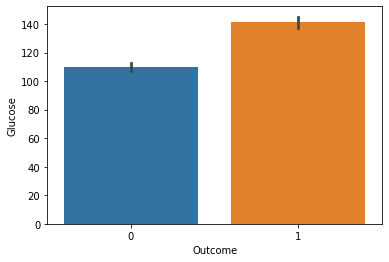

In [22]:
# 당뇨병 발병에 따른 포도당(Glucose) 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

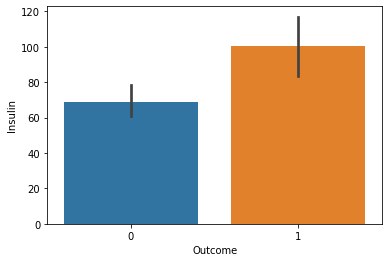

In [23]:
# Insulin 수치가 0 이상인 관측치에 대해 당뇨병 발병 비교
# 결측치로 추정되는 0값이 너무 많기 때문

sns.barplot(data=df, x="Outcome", y="Insulin")

# estimator = <function mean at 0x0000025DFF06CA60> : 기본적으로 y축 값은 평균값을 측정
# 검은 선 : 95% 신뢰 구간

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

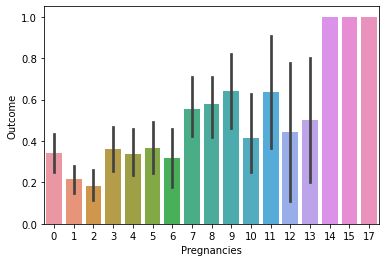

In [24]:
# 임신횟수에 대한 당뇨병 발병 비율 비교

sns.barplot(data=df, x="Pregnancies", y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

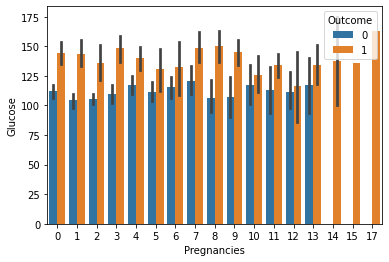

In [25]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose)수치를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

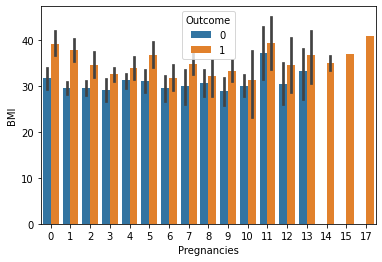

In [26]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

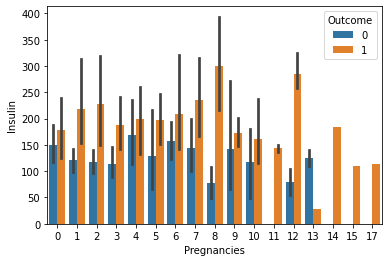

In [27]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화
# 위와 마찬가지로 0보다 큰 값에 대해서만 시각화

sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

- 0 포함 시각화 한 경우
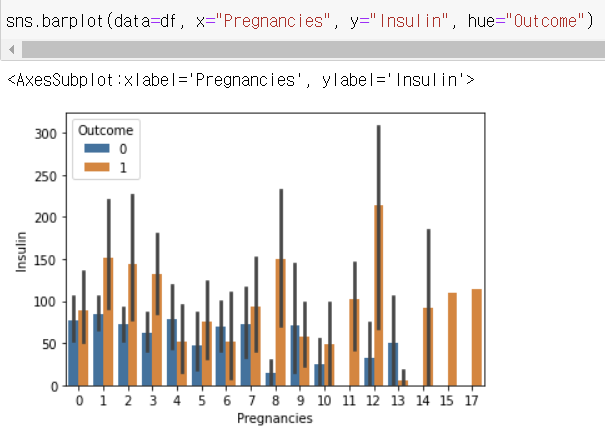

### boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

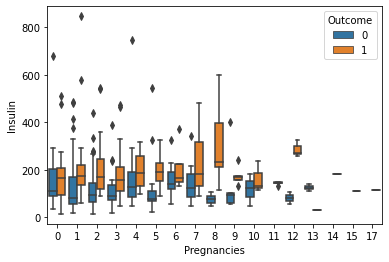

In [28]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화
# 0보다 큰 값만 사용

sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

- 0 포함 시각화 한 경우
- boxplot 값이 0에 붙어있음 -> Insulin=0인 값이 많아서

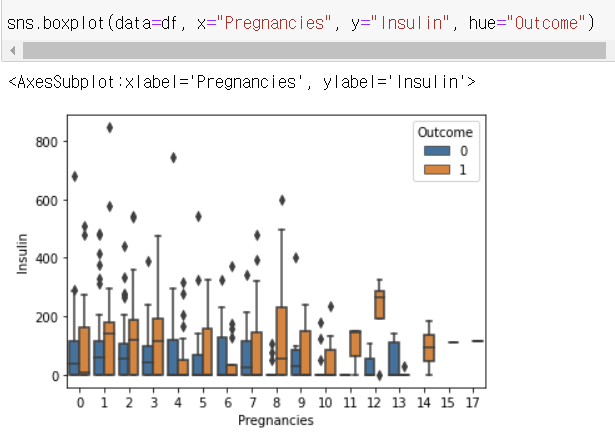

### violinplot
- 사분위수만 알 수 있었던 boxplot과 달리, 각 데이터 내의 분포까지 확인할 수 있다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

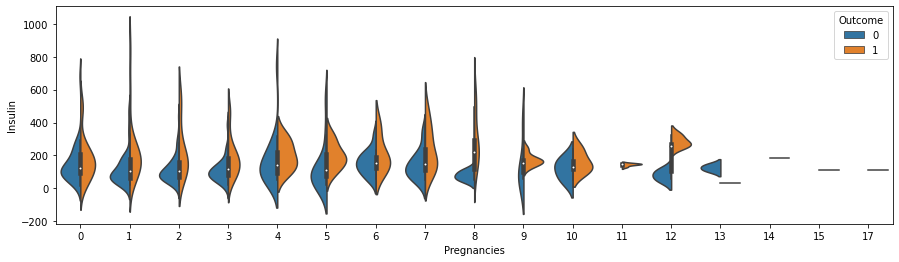

In [29]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0], 
               x="Pregnancies", y="Insulin", hue="Outcome", split=True)
# split=True : 발병률을 반으로 쪼개서 그림. Outcome이 2개 값 뿐이기 때문에 가능

### swarmplot
- categorical한 데이터의 산점도(산포도)를 그리는데 적합하다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

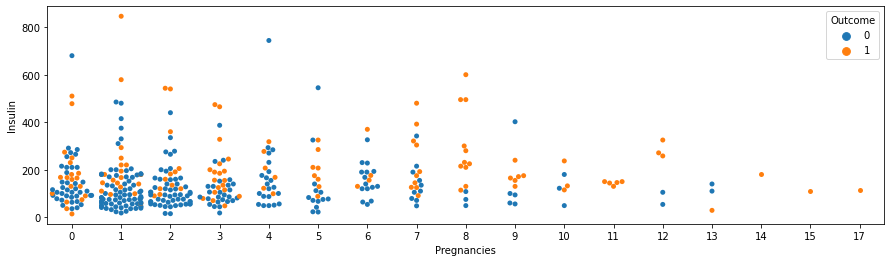

In [36]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"]>0],
              x="Pregnancies", y="Insulin", hue="Outcome")

- barplot에서 임신횟수가 높은 케이스에서 발병하지 않은(Outcome=0) 그래프가 없었던 것은 모수가 1개뿐이었기 때문이었는데, 이를 violinplot이나 swarmplot을 통해 확인할 수 있다.
- 지금까지의 그래프를 통해 확인했을 때, Pregnancies(임신횟수)는 발병률에 영향을 주는 것으로 보인다.

### distplot
- 한 개의 수치형 변수를 표현할 때 보통 사용함.
- 한 개의 범주형 변수를 나타낼 때는 countplot 사용했음!

In [37]:
df_0 = df[df["Outcome"] == 0]  # 당뇨병 발병X 데이터
df_1 = df[df["Outcome"] == 1]  # 당뇨병 발병O 데이터
df_0.shape, df_1.shape

((500, 10), (268, 10))

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

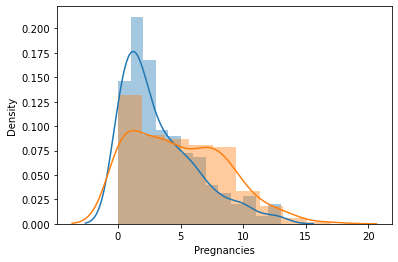

In [38]:
# 임신횟수에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0["Pregnancies"])  # 위의 plot들과 다르게, data 옵션 없이 바로 Series 데이터 넣어줌.
sns.distplot(df_1["Pregnancies"])

- Pregnancies 값을 5 기준, 5 이전은 발병하지 않는 케이스가 많고, 5 이후는 발병하는 케이스가 많다.

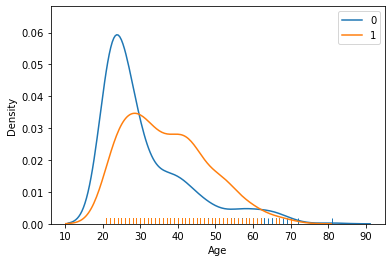

In [43]:
# 나이에 따른 당뇨병 발병 여부를 시각화

sns.distplot(df_0["Age"], hist=False, rug=True, label=0) # hist=False : 히스토그램 없이 곡선만 그림
sns.distplot(df_1["Age"], hist=False, rug=True, label=1) # rug=True : 실제 데이터의 위치를 카펫처럼 바닥에 표기
plt.legend()  # 그냥 실행하면 범례가 나오지 않아 추가한 코드
plt.show()

## Subplots

### 1) pandas 이용, histplot 그리기
* pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줌.

In [44]:
# hist() 함수는 Boolean 값을 지원하지 않음 -> 데이터 타입을 수치형으로 변환

df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0


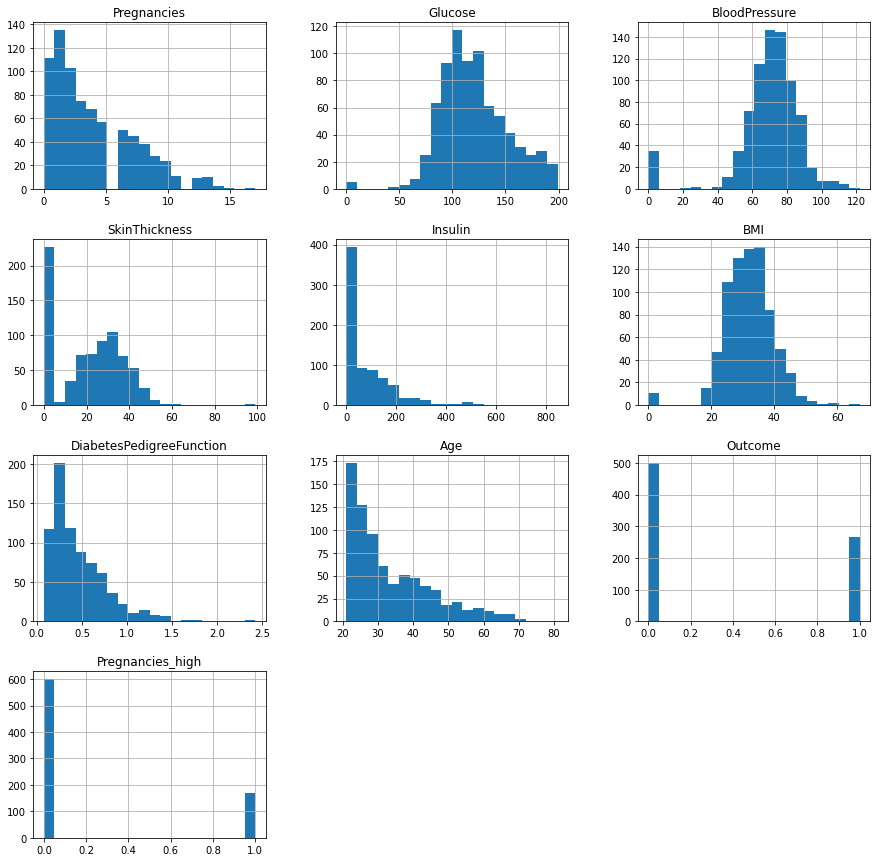

In [45]:
h = df.hist(figsize=(15,15), bins=20)
# 변수에 할당하면 text 출력 안 돼서 더 깔끔함
# bins=20 : 막대 개수를 늘려 더 자세하게 표현

### 2) 반복문으로 서브플롯 그리기
#### distplot

In [46]:
# 시각화 할 컬럼 리스트 생성
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

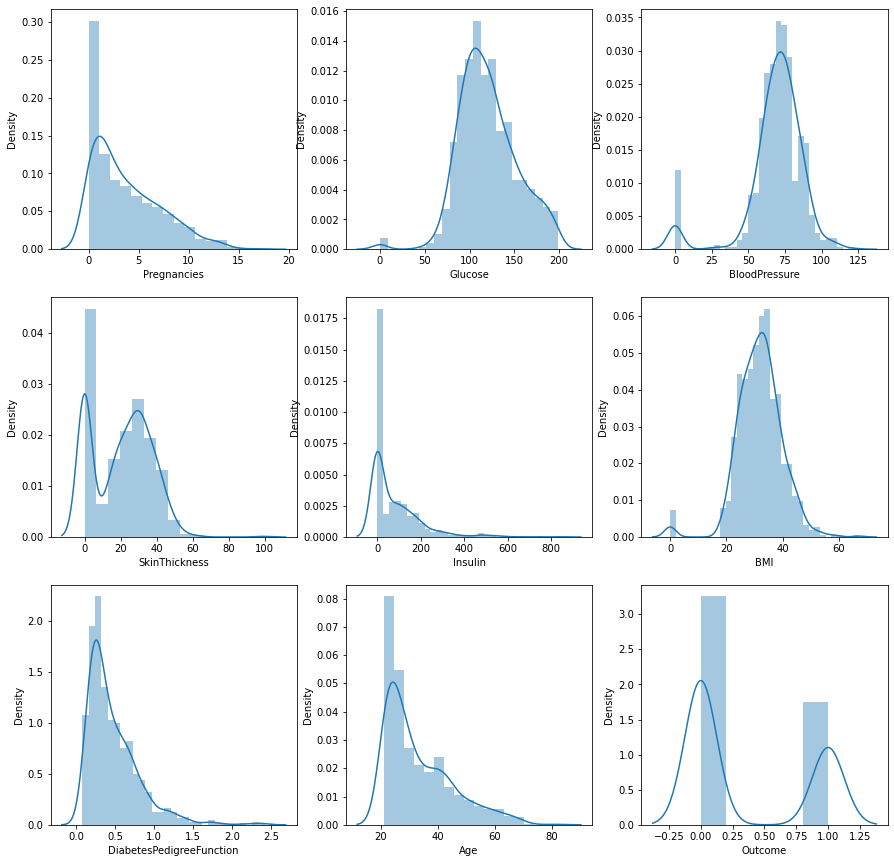

In [47]:
# 9개의 서브플롯 칸 생성, 반복문으로 그래프 할당

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row, col])  # ax=axes[row][col]: 원하는 위치에 그래프를 넣을 수 있음

hist와 distplot의 차이
- `hist` : y축 = 빈도 수
- `distplot` : y축 = 적분해서 1이 되는 값(비율), 부드러운 밀도 함수 출력

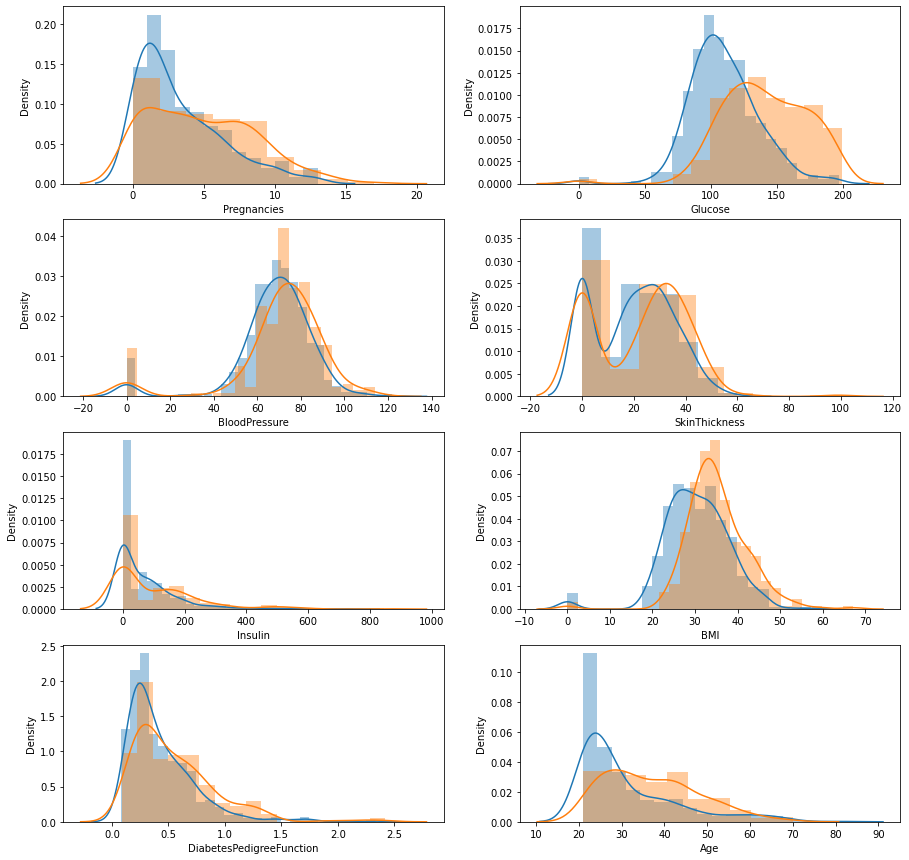

In [48]:
# 모든 변수에 대한 distplot 출력
# 당뇨병 발병 여부에 따라 구분해 그래프 생성

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row, col])
    sns.distplot(df_1[col_name], ax=axes[row, col])

- distplot을 확인했을 때, 연속형 변수에서 특정값에 따라서 Outcome 값이 달라진다면 수치형 변수를 범주형 변수로 바꿔 표현해 볼 수 있다.

#### violinplot

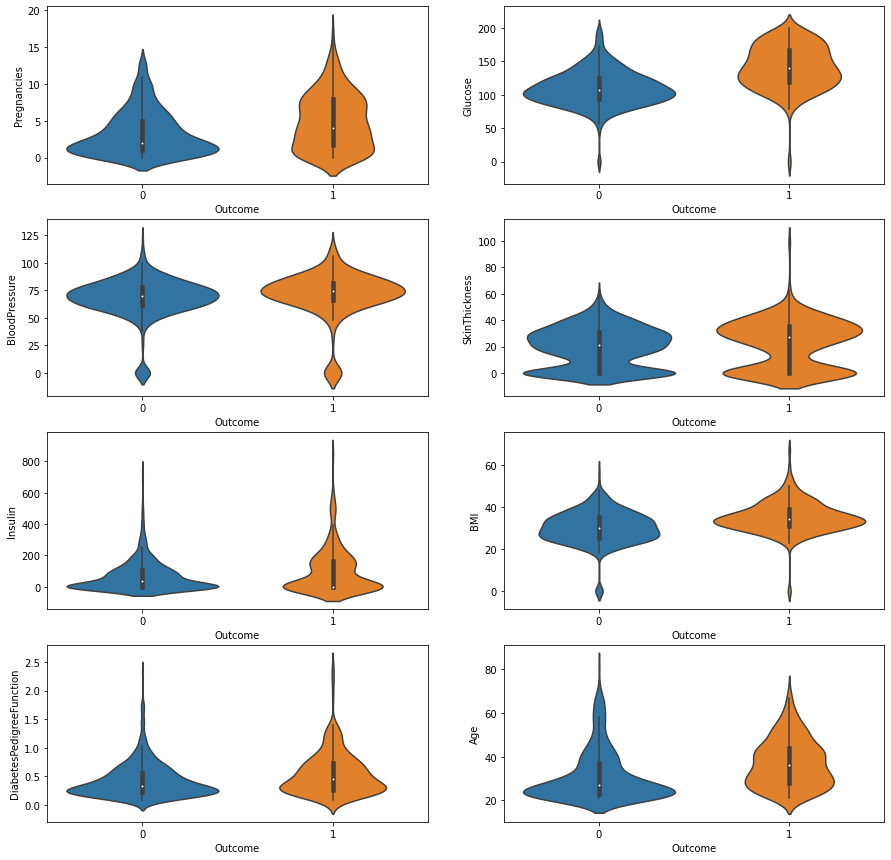

In [49]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

- BloodPressure, SkinThickness, Insulin, BMI 등에서 0값이 많은 것을 확인할 수 있음.

#### lmplot

* 상관계수가 높은 두 변수에 대해 시각화

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

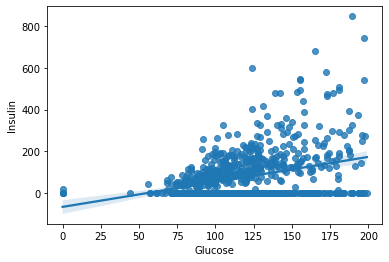

In [50]:
# Glucose와 Insulin 사이 상관관계가 강할 것으로 예측
# 확인해보기 위해 시각화 진행

sns.regplot(data=df, x="Glucose", y="Insulin")

- regplot : 회귀선을 그려주는 plot
- Insulin=0인 값이 많아 아래쪽에 선이 생긴다.
- regplot에는 hue 옵션이 없음 → Outcome에 따라 다르게 표시하고 싶다면 다른 그래프(lmplot) 사용!

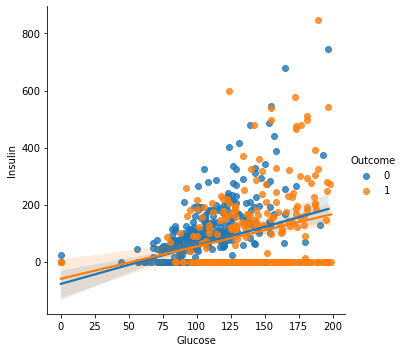

In [51]:
# Glucose 와 Insulin 을 Outcome 으로 구분

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

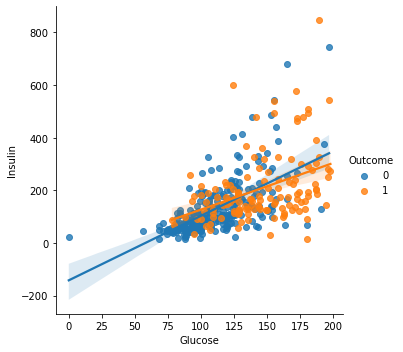

In [52]:
# Insulin 수치가 0 이상인 데이터로만 시각화

sns.lmplot(data=df[df["Insulin"]>0], x="Glucose", y="Insulin", hue="Outcome")

- 이전에 비해 회귀선의 기울기가 1에 가까워진 것을 확인할 수 있음

#### pairplot

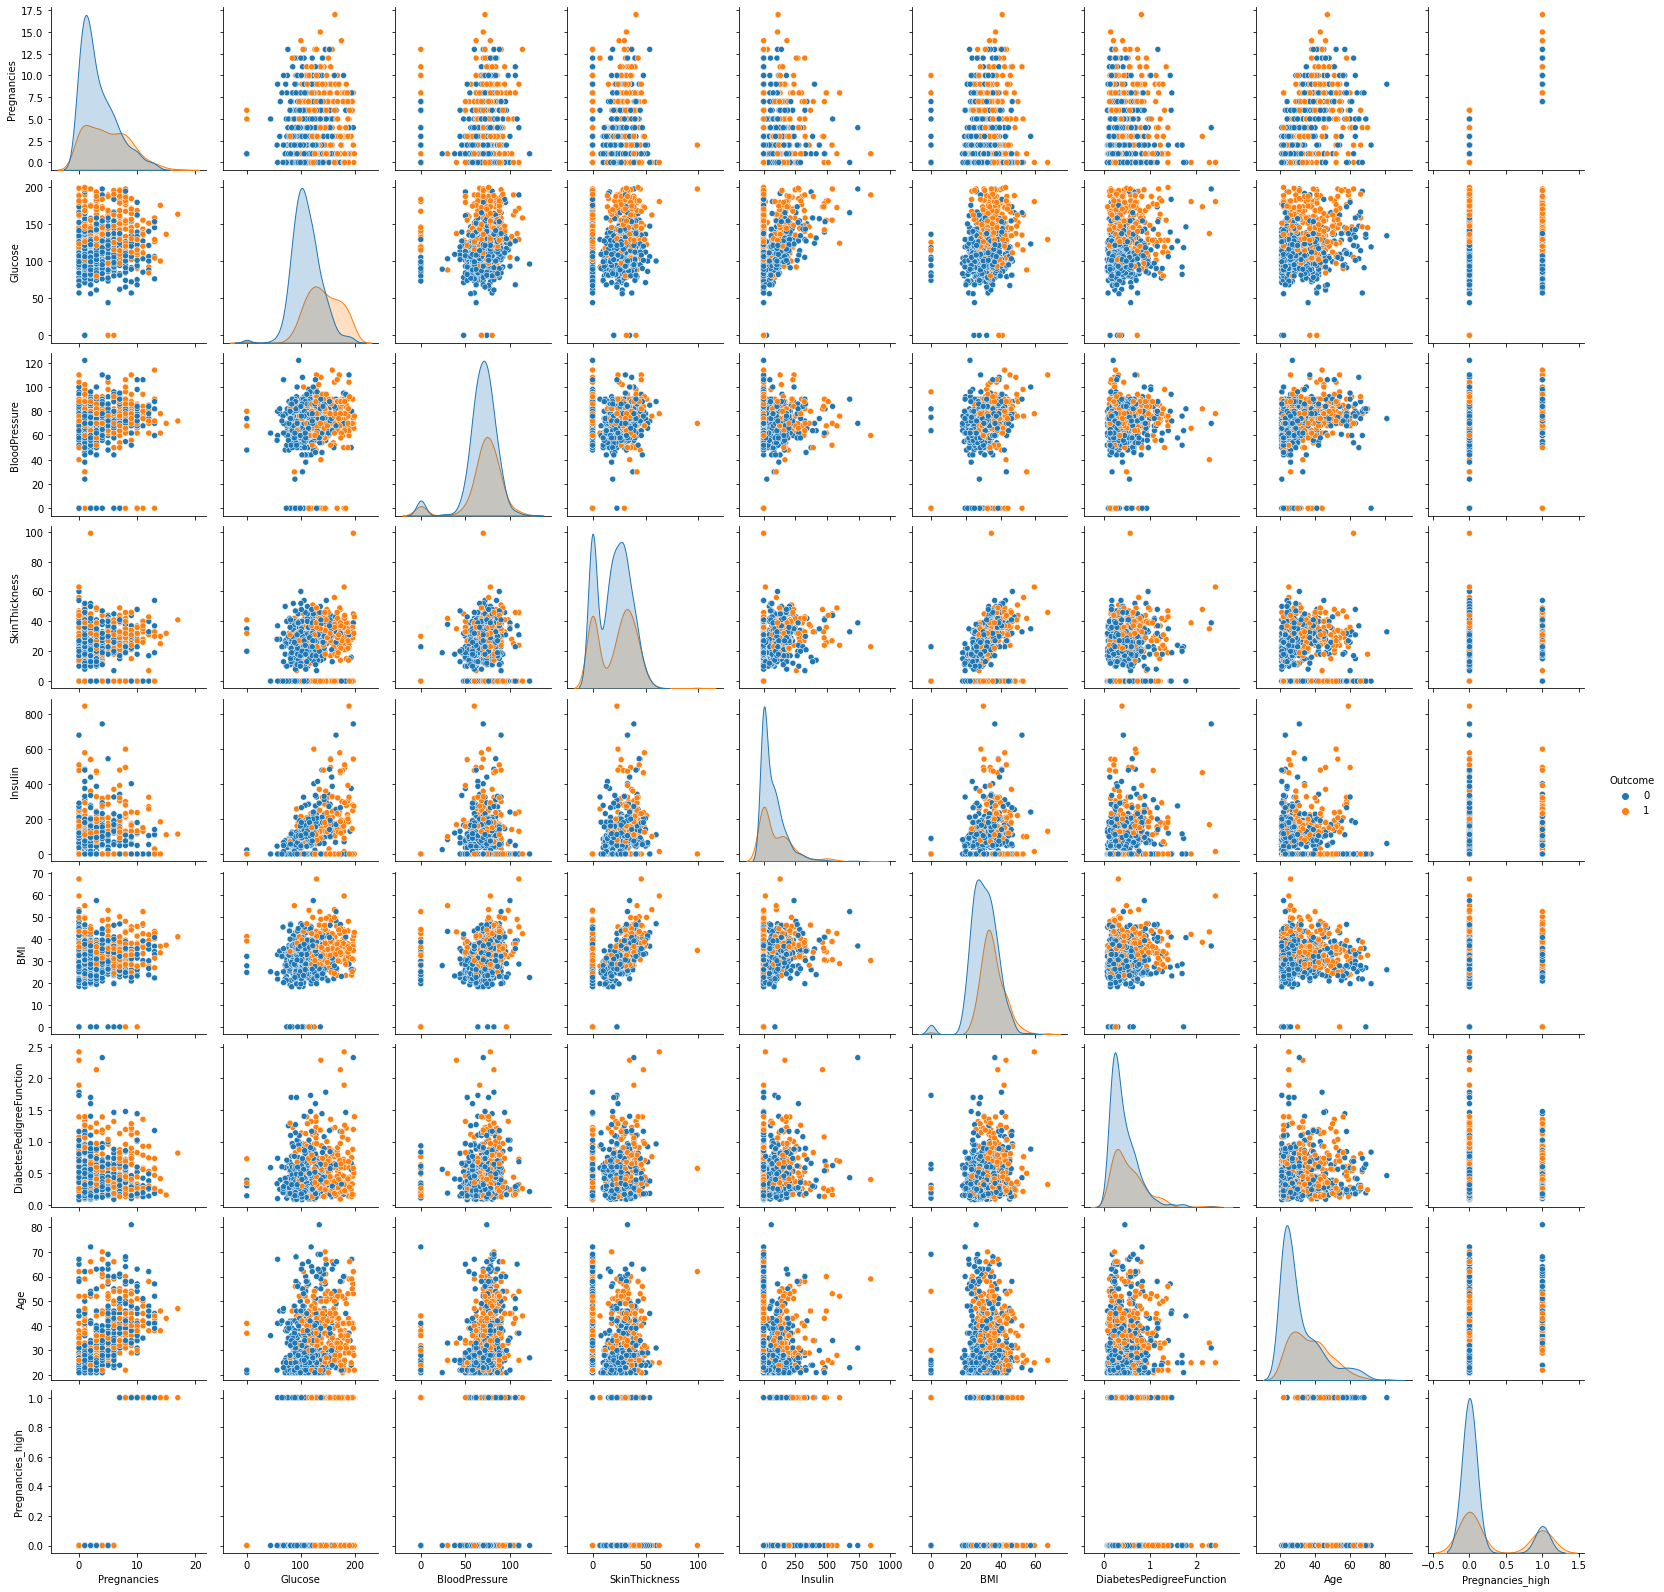

In [53]:
sns.pairplot(df, hue="Outcome")
# default = "scatter". kind 옵션을 바꿔주면 다른 그래프 그릴 수 있다.

#### pairgrid

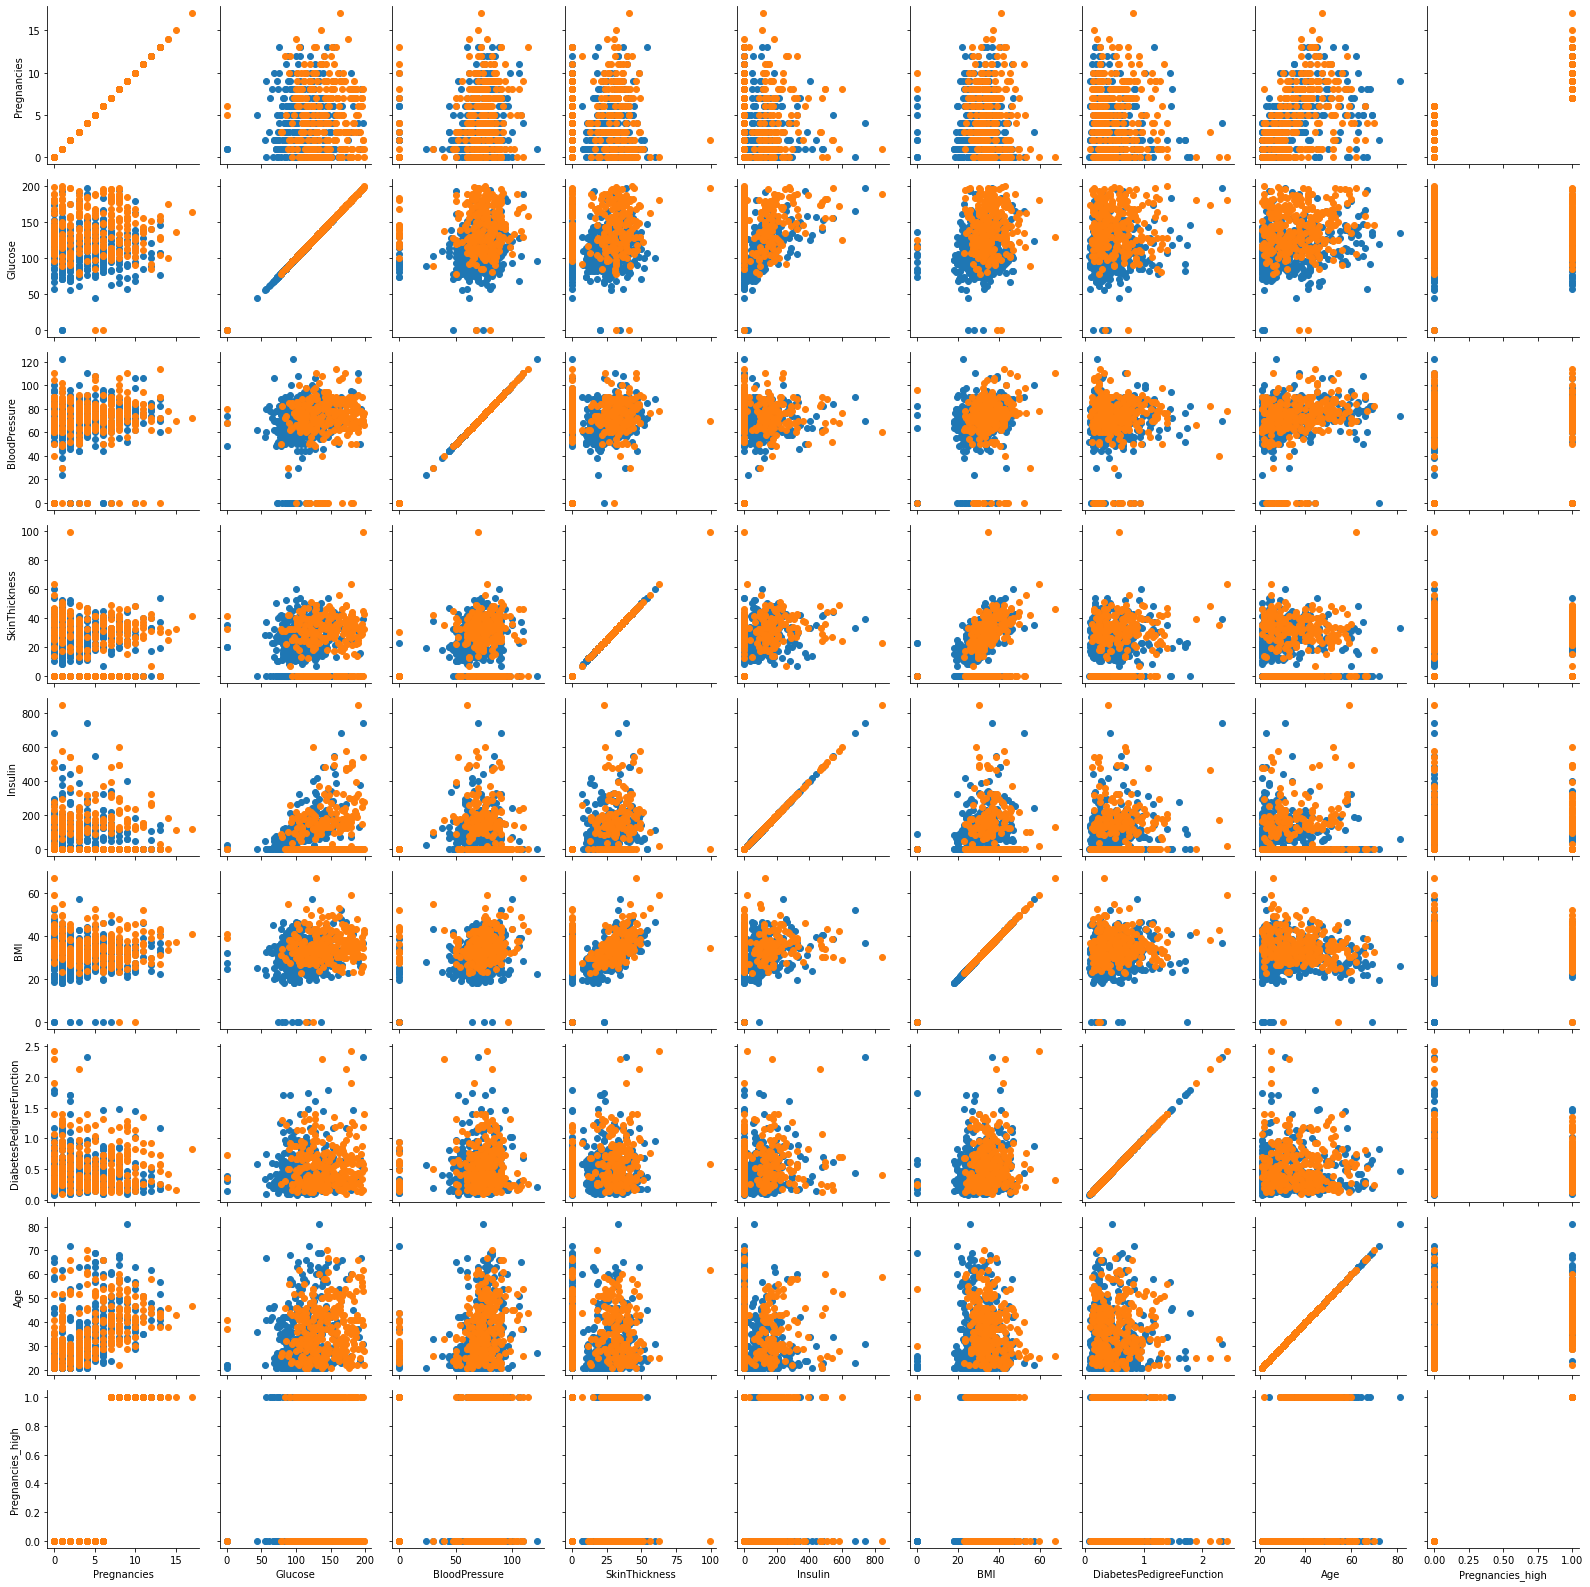

In [141]:
# 모든 변수에 대해 Outcome에 따른 scatterplot 출력

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)  # 어떤 그래프로 그릴지 설정
# 강사님 그래프에서는 Outcome plot이 나왔는데, 왜 나는 안나오는지? 확인!!

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)


```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

1. 결측치 처리 없이 진행

In [55]:
# 상관계수
df_corr = df.corr()
df_corr.style.background_gradient() # 상관계수 값의 크기를 색의 진하기로 표현

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<AxesSubplot:>

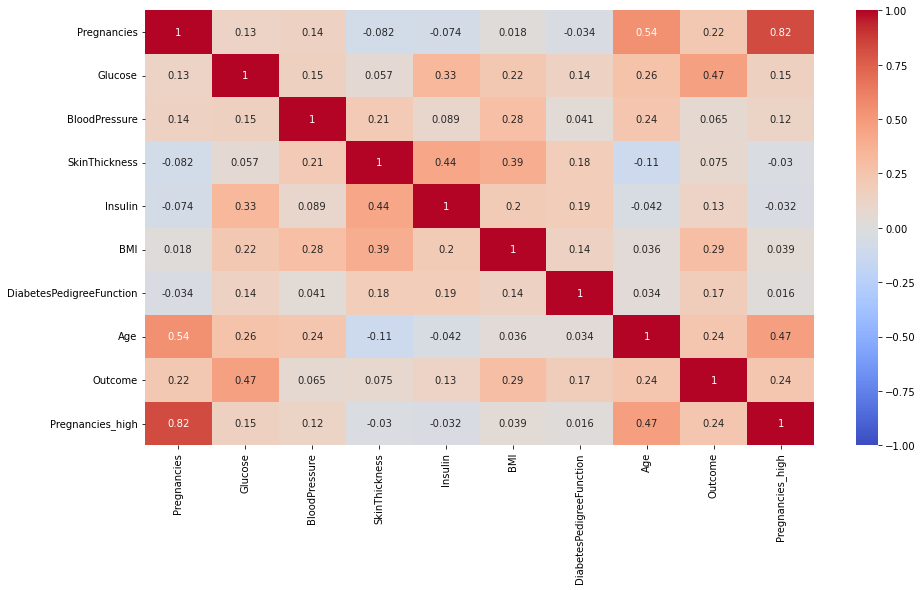

In [56]:
# 상관계수를 heatmap으로 시각화

plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")


    - 큰 상관관계를 보이는 변수는 없다.(>0.7) 
    - 그나마 가장 큰 상관관계를 보이는 변수는 Glucose(0.47)

2. 결측치 처리 후 진행

In [57]:
# feature로 사용할 컬럼들에 대해 0을 결측치로 만들어줌.
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


- Pregnancies 변수는 결측치 처리하면 안 될 것 같은데 그냥 편의성 문제로 하는 듯?

In [58]:
# corr
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

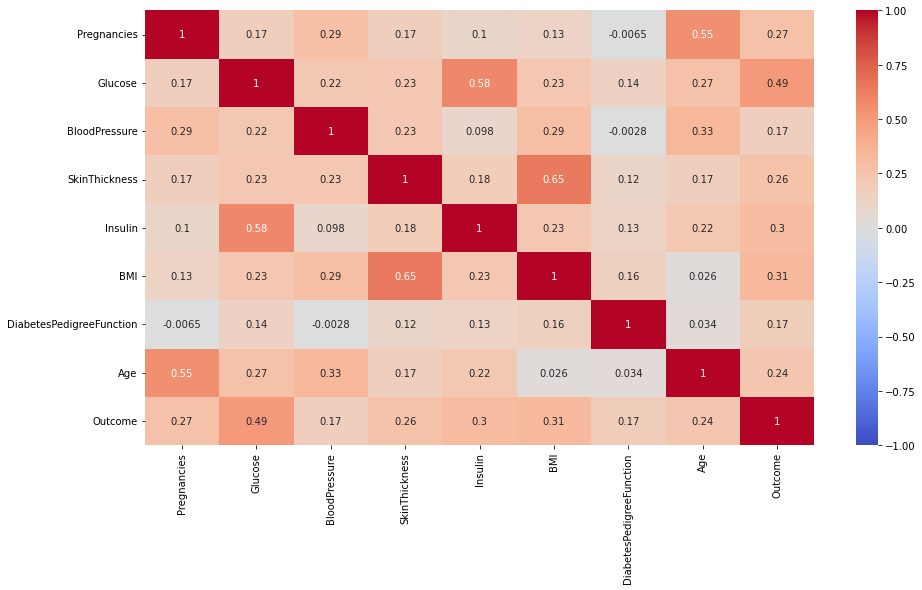

In [59]:
# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

꽤 높은 상관관계를 보이는 변수들
- Outcome - Glucose(0.49)
- Insulin - Glucose(0.58)
- Outcome - Insulin(0.3)

In [60]:
# Outcome에 대한 상관계수

df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

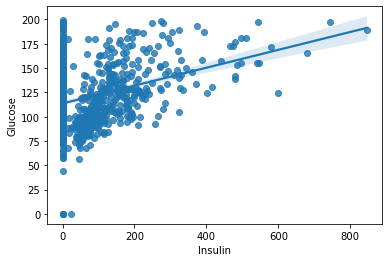

In [61]:
# Insulin -- Glucose (regplot)

sns.regplot(data=df, x="Insulin", y="Glucose") # 0값이 굉장히 많음

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

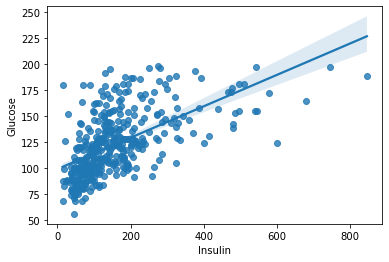

In [62]:
# 결측치 처리 후 다시 시각화

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

- 상관관계가 꽤 높아보이지만 이상치도 많아보이기 때문에, 전처리를 해준다면 더 좋은 결과를 얻지 않을까 예측해 볼 수 있음.

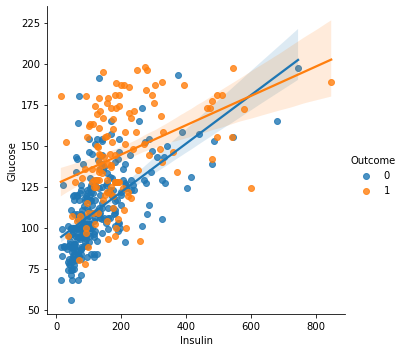

In [63]:
# 결측치 처리 후, Outcome 값에 따라 다른 색으로 시각화

sns.lmplot(data=df_matrix, x="Insulin", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

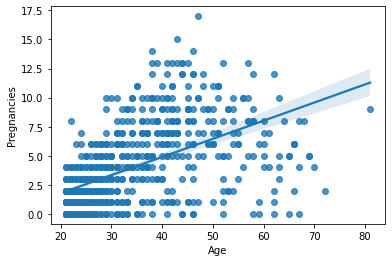

In [64]:
# Age -- Pregnancies (regplot)

sns.regplot(data=df, x="Age", y="Pregnancies")

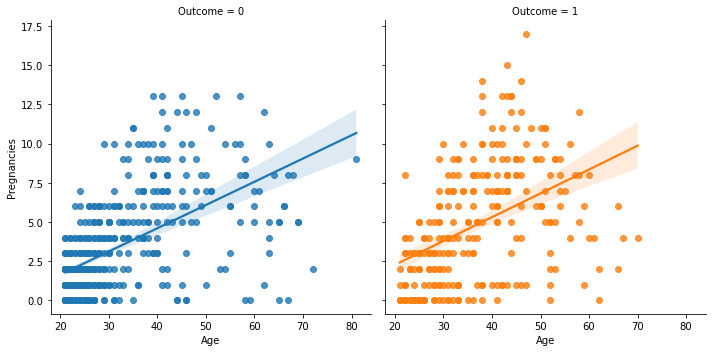

In [65]:
# Age -- Pregnancies (lmplot), Outcome 값에 따라 다른 색으로 시각화

sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")
# lmplot은 자체적으로 subplot 그릴 수 있음